## Module 4
#### Class ALY6040.80439: Data Mining
#### Prof. Justin Grosz

### Team X members:  
####Hang Wu

#### May 8, 2022

In [51]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
from zipfile import ZipFile
import io
#import urllib2
from urllib.request import urlopen
import numpy as np #used for number manipiulation
import matplotlib.pyplot as plt #used for plotting
import math
import seaborn as sns
#imports
#!pip3 install scikit-learn
#!pip3 install lightgbm
#!pip3 install xgboost
#!pip install --upgrade matplotlib
#!pip install --upgrade pandas
#!pip install --upgrade numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [52]:
##Restart session after each time the update occured, becasue Google Collab resets the udpate every time
#import os
#os.kill(os.getpid(), 9)


In [53]:
##Data extraction##

#r = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/KickS-additional.zip").read()
#print(io.BytesIO(r))
#file = ZipFile(io.BytesIO(r)) #use io.ByteIO instead of io.StringIO to get the data into the correct unicode
import urllib
import urllib.request; 
#opener = urllib.request.urlopen()
#opener = urllib.request.URLopener()
url = "https://60802.s3.amazonaws.com/bike_crash+(1).csv"#upload to s3 because localhost kernel has issues, force to use online collab that required
#me to read file
ks_csv=urllib.request.urlopen(url)
#ks_csv = opener.open(url)

#print(file)
#file.extractall() #extract the folder to the current path
#print(file.namelist()) # list all of the files in the zip
#KickS_csv = file.open("KickS-additional/KickS-additional-full.csv") #open the file from the zip
KickS = pd.read_csv(ks_csv,sep = ',') # read_csv returns the dataframe type
display(KickS.head(3))
df=KickS
df_backup=df
#print(KickS)


,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn


Shape of Dataframe

In [54]:
df.shape

(2463, 16)

Data type of features

In [55]:
df.dtypes

$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
At Intersection Flag                           bool
Average Daily Traffic Amount                 object
Construction Zone Flag                       object
Crash Severity                               object
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Intersection Related                         object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Person Helmet                                object
dtype: object

##CONVERT clock_speed to float

In [56]:
#df["clock_speed"] = pd.to_numeric(df['clock_speed'], errors='coerce').convert_dtypes()

In [57]:
#All numeric attributes plotted as bar graphs (total of 10)
import matplotlib.pyplot as plt

df1 = df.select_dtypes([np.int, np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    df[col] = pd.to_numeric(df[col], errors='coerce').convert_dtypes()

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

STATISTICAL SUMMARY OF NUMERICAL COLUMNS

In [58]:
round(df.describe(),2)

,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
count,2463.00,2463.00,2463.00,2463.00
mean,1404.70,1.09,2013.40,26.41
std,558.97,1.21,2.25,17.01
min,1.00,0.00,2010.00,-1.00
25%,1008.00,1.00,2011.00,0.00
50%,1532.00,1.00,2013.00,30.00
75%,1822.50,1.00,2015.00,35.00
max,2358.00,15.00,2017.00,65.00


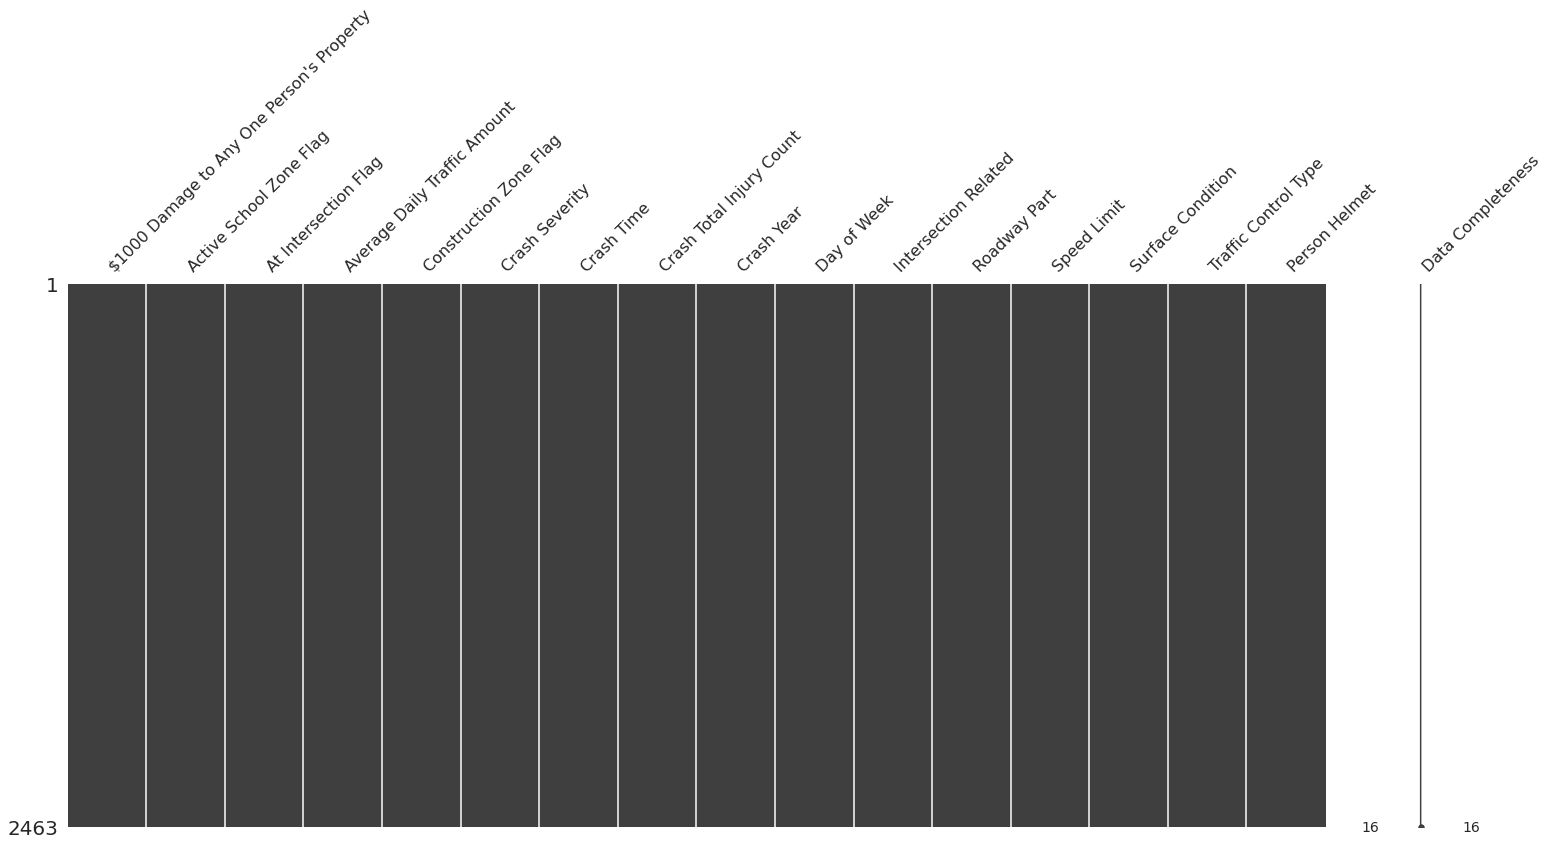

In [59]:
import missingno as msno
df_X=df
msno.matrix(df_X, labels=True, sort="descending");

In [60]:
#print(KickS.columns)

##Data Clean: data transformation, convert tdfpes##
#Conversion: convert it to a dictionardf
KickSd = KickS.to_dict()
#print(KickSd["age"])
#check if the data needs transformation
# skewness along the index axis
skewness = KickS.skew(axis=0, skipna = True)
#tdfpe(skewness) #float, let's change to dataframe
skewness = pd.DataFrame(skewness)
skewness.columns.name = "skewness"
display(skewness) #use skewness to get the descriptive stat, and renormalize the data
###---------------display the 
df = KickS




skewness,0
At Intersection Flag,-0.101695
Crash Time,-0.601814
Crash Total Injury Count,10.001808
Crash Year,0.118136
Speed Limit,-0.614988


In [61]:
# kurtosis along the index axis
kurtosis = KickS.kurtosis(axis=0, skipna = True)
#tdfpe(skewness) #float, let's change to dataframe
kurtosis = pd.DataFrame(kurtosis)
print(kurtosis.columns.name)
kurtosis.columns.name = "kurtosis"

display(kurtosis)

None


kurtosis,0
At Intersection Flag,-1.991276
Crash Time,-0.343128
Crash Total Injury Count,111.728447
Crash Year,-1.202412
Speed Limit,-0.822148


## Checking for missing values

In [62]:

df.isnull().sum()
#Clean data with .nadrop()
df = df.dropna()


In [63]:
#count number of na
df.isnull().sum(axis = 0)


$1000 Damage to Any One Person's Property    0
Active School Zone Flag                      0
At Intersection Flag                         0
Average Daily Traffic Amount                 0
Construction Zone Flag                       0
Crash Severity                               0
Crash Time                                   0
Crash Total Injury Count                     0
Crash Year                                   0
Day of Week                                  0
Intersection Related                         0
Roadway Part                                 0
Speed Limit                                  0
Surface Condition                            0
Traffic Control Type                         0
Person Helmet                                0
dtype: int64

##Numerical features data distribution

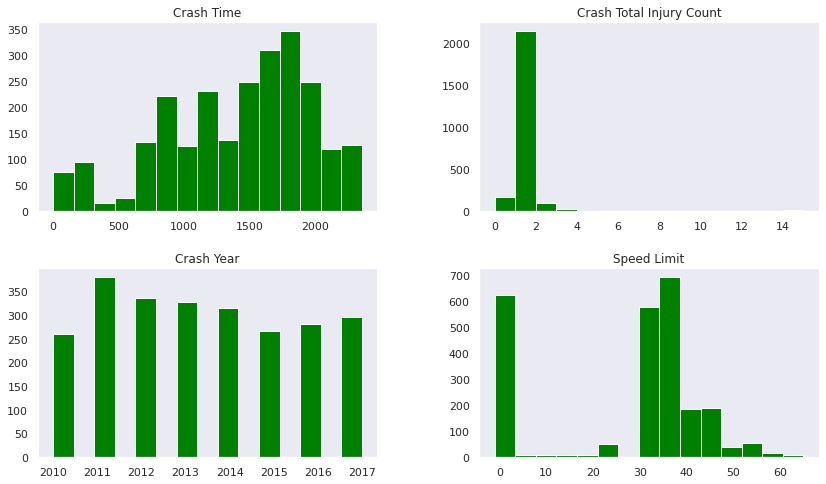

In [64]:
sns.set(rc={'figure.figsize':(12,10)})
df.hist(figsize=(14,8),
               bins=15,
               grid=False,
               color='green')
plt.show()

##Features that are Numeric Columns Only

In [65]:
numericalColumn = df.select_dtypes([np.number]).columns
print(numericalColumn.size)
print("\nNumerical columns: \n", numericalColumn)

4

Numerical columns: 
 Index(['Crash Time', 'Crash Total Injury Count', 'Crash Year', 'Speed Limit'], dtype='object')


##Dealing with Outliers of Three_G

In [66]:
#get rid of outliers instead of marking them mean, unless that's needed then will do that after dealing with this first/
#num_cols = ["three_g",'fc',]
#for c in num_cols:     
 # Q1 = df[c].quantile(0.25)
 # Q3 = df[c].quantile(0.75)
 # IQR = Q3-Q1

  #filter = (df[c] >= Q1 - 1.5 * IQR) & (df[c] <= Q3 + 1.5 *IQR)
  #df=df.loc[filter]

#df


In [67]:
#a = np.arange(df['age'])
#hist, bin_edges = np.histogram(a)
import matplotlib.pyplot as plt

In [68]:
#@title Default title text
corrMatrix = df.corr()
display(df.corr()) #display the correlation matrix table

,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
At Intersection Flag,1.000000,0.091936,-0.093733,0.033365,-0.017153
Crash Time,0.091936,1.000000,0.008288,0.036539,-0.081533
Crash Total Injury Count,-0.093733,0.008288,1.000000,-0.081439,0.036863
Crash Year,0.033365,0.036539,-0.081439,1.000000,-0.082059
Speed Limit,-0.017153,-0.081533,0.036863,-0.082059,1.000000


In [69]:
import statsmodels.stats.api as sms

#sms.DescrStatsW(df).tconfint_mean()


In [70]:
df_X = df
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["Crash Severity"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 84 duplicates in your database.


In [71]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Crash Severity"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape


(2379, 16)

##Correlation Matrix: rule out MultiColinear related features

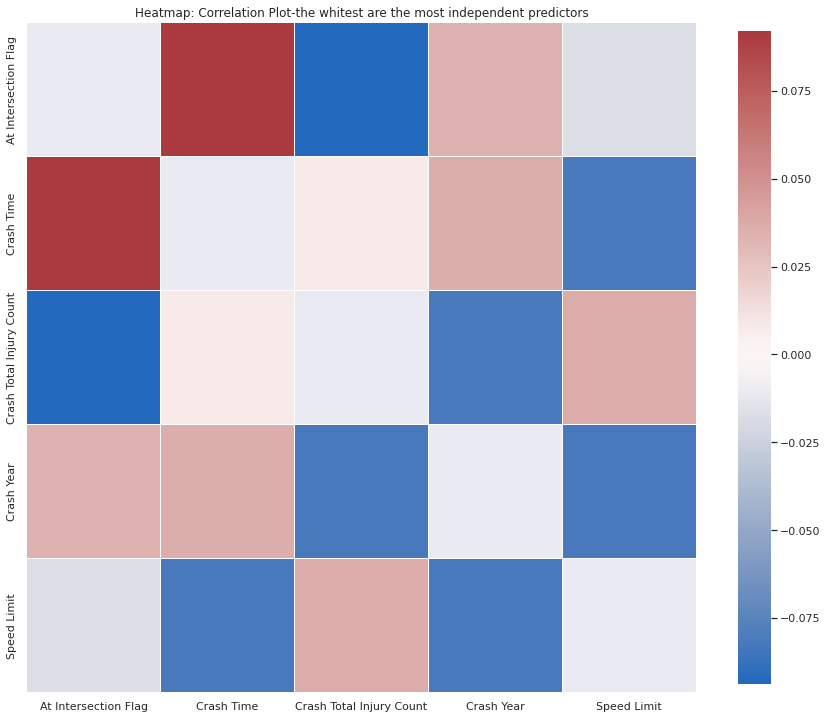

In [72]:
df_X=df

# Computes feature correlation
df_corr = df_X.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}).set(title=f"Heatmap: Correlation Plot-the whitest are the most independent predictors");

##Helper Function and Lirary Needed

In [73]:
#sklearn will be used in later modelling
import pandas as pd
from zipfile import ZipFile
import io
import math
import seaborn as sns
#imports
!pip3 install scikit-learn
!pip3 install lightgbm
!pip3 install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import pickle
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy.stats import ttest_rel
from numpy import sqrt, abs, round
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest as ztest
# machine learning
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import lightgbm
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [74]:

def histogram(df, feature):
    """
    Generates histogram plot on a feature of dataframe
    :param df: dataframe of loaded data
    :param feature: name of the feature
    """
    x_label = feature.capitalize()
    ax = sns.histplot(data=df, x=feature)
    plt.xlabel(f"{x_label}", size=14)
    plt.ylabel("Count", size=14)
    plt.title(f"Histogram: {x_label} Distribution", size=18)
    plt.savefig(f"{feature}_hist.png") #save image
    return plt

def barplot(df, x='', hue='',title=''):
    """
    Generates barplot plot on a features of dataframe
    :param df: dataframe of loaded data
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    ax = sns.countplot(x = x, hue= hue, data = df)
    x_label = x.capitalize()
    hue_label = hue.capitalize()
    xticklabels = list(df[x].unique())
    xticklabels = [str(i).upper() for i in xticklabels]
    ax.set_xticklabels(xticklabels)
    plt.xlabel(f"{x_label}", size=14)
    plt.ylabel(f"{hue_label} Count", size=14)
    plt.title(title)
    #plt.title(f"Bank Barplot: {hue_label} vs {x_label}", size=18)
    plt.savefig(f"{x_label}_barplot.png") #save image
    # add annotations
    for c in ax.containers:
      labels = [f'{v.get_height()/df[x].count()*100:0.1f}%' if (v.get_height()) > 0 else '' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')

    return plt

# function for countplot
def countplot(x, hue, **kwargs):
    """
    Generates countplot plot on a features
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    ax = sns.countplot(x=x, hue=hue,**kwargs)
    for c in ax.containers:
      labels = [f'{v.get_height()/df[x].count()*100:0.1f}%' if (v.get_height()) > 0 else '' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')
    plt.savefig(f"countplot_{x_label}.png") #save image

def grid_barplot(df='', row='', x='', hue=''):
    """
    Generates grid barplot plot on a features of dataframe
    :param df: dataframe of loaded data
    :param row: name of the feature for horizontal axis
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    # Find out how many people have insurance considering poverty, region, country
    g = sns.FacetGrid(data=df, row=row, height=2, aspect=2.5, sharex=False, sharey=False)
    g.map_dataframe(countplot, x=x, hue=hue, alpha=.6,
                    palette=sns.color_palette("tab10"))

    g.fig.suptitle('Health Insurance Enrollment')
    g.fig.subplots_adjust(top=0.9, left=0.1)
    g.set_xlabels(f'{row.capitalize()}')
    g.set_ylabels('Count')
    g.add_legend()
    return plt

def plot_feature_importance(X, Y):
    """
    Generates a plot of feature importance percentage
    :param X: independant features
    :param Y: dependant features
    """
    model = xgb.XGBClassifier()
    model.fit(X, Y)
    importance = model.feature_importances_
    feature_importance = np.array(importance)
    feature_names = np.array(X.columns)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('XGBoost Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return plt

def get_test_plots(df, sample1, sample2):
    """
    Generates box and violine plots between two features of a dataframe
    :param df: dataframe of loaded data
    :param sample1: name of feature1
    :param sample2: name of feature2
    """
    sns.boxplot(x=sample1, y=sample2, data=df)
    plt.xlabel(f"{sample1.capitalize()}", size=14)
    plt.ylabel(f"{sample2.capitalize()}", size=14)
    plt.title(f"Boxplot: {sample1.capitalize()} vs {sample2.capitalize()} Comparison", size=20)
    plt.show()
    sns.violinplot(x=sample1, y=sample2, data=df)
    plt.xlabel(f"{sample1.capitalize()}", size=14)
    plt.ylabel(f"{sample2.capitalize()}", size=14)
    plt.title(f"Violinplot: {sample1.capitalize()} vs {sample2.capitalize()} Comparison", size=20)
    plt.show()
def  computeCI(stats):
  
    ci95_hi = []
    ci95_lo = []
    CI = []
    for i in stats.index:
        m, c, s = stats.loc[i]
        ci95_hi.append(float(m + 1.96*s/math.sqrt(c)))
        ci95_lo.append(float(m - 1.96*s/math.sqrt(c)))
        #CI.append(ci95_hi[i]-ci95_lo[i])

    stats['ci95_hi'] = pd.DataFrame(ci95_hi)
    stats['ci95_lo'] = pd.DataFrame(ci95_lo)
    #stats['CI'] = ci95_hi - ci95_lo
    display(stats.head(3)) #only display 3 results

    return stats


##Modelling

##Feature engineering: crash severity = non injured == 1. whether the user is not injured. what columns contribute the most odds.

In [75]:
#create dummy variables
category_columns = ["Day of Week",'Intersection Related','Roadway Part','Surface Condition','Traffic Control Type',"Person Helmet"]
df_dummies = pd.get_dummies(df, prefix_sep='_', columns=category_columns)
df_dummies.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Average Daily Traffic Amount',
       'Construction Zone Flag', 'Crash Severity', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Speed Limit',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Intersection Related_Driveway Access',
       'Intersection Related_Intersection',
       'Intersection Related_Intersection Related',
       'Intersection Related_Non Intersection',
       'Intersection Related_Not Reported', 'Roadway Part_Entrance/On Ramp',
       'Roadway Part_Main/Proper Lane',
       'Roadway Part_Other (Explain In Narrative)',
       'Roadway Part_Service/Frontage Road', 'Surface Condition_Dry',
       'Surface Condition_Ice',
       'Surface Condition_Other (Explain In Narrative)',
       'Surface Condition_Sand, Mu

In [76]:
#df['Severity']= np.where(df['Crash Severity']=='Not Injured', 1,0)
#non injured =1. others = 0
df_dummies['IsInjured']= [0 if i=='Not Injured' else 1 for i in df_dummies['Crash Severity']]
df_dummies['At Intersection Flag'] = [0 if i=='FALSE' else 1 for i in df_dummies['At Intersection Flag']]
df_dummies['Active School Zone Flag'] = [0 if i=='No' else 1 for i in df_dummies['Active School Zone Flag']]



In [77]:
##average traffic: no data = 0
df_dummies['Average Daily Traffic Amount'] = df_dummies['Average Daily Traffic Amount'].replace("No Data", 0)
#df_dummies['Average Daily Traffic Amount'] = [0 if i=='No Data' else for i in df_dummies['Average Daily Traffic Amount']]


In [78]:
#df["Construction Zone Flag 01"]==np.where(df["Construction Zone Flag"]=='No', 0,1)
df_dummies['Construction Zone Flag'] = [0 if i=='No' else 1 for i in df_dummies['Construction Zone Flag']]



In [79]:
#df["$1000 Damage to Any One Person's Property 01"] = np.where(df["$1000 Damage to Any One Person's Property"]=='Yes', 1,0)

df_dummies["$1000 Damage to Any One Person's Property"] = [0 if i=='No' else 1 for i in df_dummies["$1000 Damage to Any One Person's Property"]]



##Split into Ordinal and Numerical

In [80]:

# select the float columns
df_Num = df_dummies.select_dtypes(include=[np.number])
# select non-numeric columns
df_Ord = df_dummies.select_dtypes(exclude=[np.number])

df_Num

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,Day of Week_Friday,Day of Week_Monday,...,Traffic Control Type_Signal Light With Red Light Running Camera,Traffic Control Type_Stop Sign,Traffic Control Type_Warning Sign,Traffic Control Type_Yield Sign,Person Helmet_Not Worn,Person Helmet_Unknown If Worn,"Person Helmet_Worn, Damaged","Person Helmet_Worn, Not Damaged","Person Helmet_Worn, Unk Damage",IsInjured
0,0,0,1,0,239,1,2010,45,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,310,2,2010,35,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,310,2,2010,35,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,310,2,2010,35,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,2300,1,2010,45,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0,0,1,0,1254,1,2017,40,0,0,...,0,0,0,0,1,0,0,0,0,1
2459,0,0,1,0,2048,1,2017,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
2460,0,0,1,0,737,0,2017,30,0,0,...,0,0,0,0,1,0,0,0,0,0
2461,1,0,1,0,930,1,2017,-1,1,0,...,0,1,0,0,0,0,0,0,1,1


##Singular matrix
##VIF Score, Colinearity

In [81]:
#http://www.how2stats.net/2011/09/variance-inflation-factor-vif.html#:~:text=Perhaps%20most%20commonly%2C%20a%20value,10%20%3D%2010).
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
df_dummies = clean_dataset(df_Num)
df_dummies

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,Day of Week_Friday,Day of Week_Monday,...,Traffic Control Type_Signal Light With Red Light Running Camera,Traffic Control Type_Stop Sign,Traffic Control Type_Warning Sign,Traffic Control Type_Yield Sign,Person Helmet_Not Worn,Person Helmet_Unknown If Worn,"Person Helmet_Worn, Damaged","Person Helmet_Worn, Not Damaged","Person Helmet_Worn, Unk Damage",IsInjured
0,0.0,0.0,1.0,0.0,239.0,1.0,2010.0,45.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,310.0,2.0,2010.0,35.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,310.0,2.0,2010.0,35.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,310.0,2.0,2010.0,35.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,2300.0,1.0,2010.0,45.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0.0,0.0,1.0,0.0,1254.0,1.0,2017.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2459,0.0,0.0,1.0,0.0,2048.0,1.0,2017.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2460,0.0,0.0,1.0,0.0,737.0,0.0,2017.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2461,1.0,0.0,1.0,0.0,930.0,1.0,2017.0,-1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [83]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def VIF_Score(df):
  df = df[list(df.columns[2:])]
  X = df[list(df.columns[:-2])]
  print(X.shape[1])
  vif_info = pd.DataFrame()
  vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif_info['Column'] = X.columns
  vif_info.sort_values('VIF', ascending=False)
  return vif_info.sort_values('VIF', ascending=False)


vif_score = VIF_Score(df_dummies)
print(vif_score)


df_dummies=df_dummies.drop(columns=vif_score[vif_score['VIF']==np.inf ]['Column'])
#df_Final=df_dummies.drop(columns=vif_score[vif_score['VIF']>10]['Column'])
#df_Final = df_Final.drop(columns=['At Intersection Flag','Crash Year'])
##drop features with VIF>10
df_Final=df_dummies.drop(columns=vif_score[vif_score['VIF']>10]['Column'])
#df_Final=df_dummies_cont
#df_dummies.columns[vif_score['Column'], axis = 1, inplace = True]
df_Final
vif_score

10
             VIF                           Column
0  822442.200028             At Intersection Flag
6       4.036053           Person Helmet_Not Worn
7       2.982870    Person Helmet_Unknown If Worn
9       2.582732  Person Helmet_Worn, Not Damaged
8       1.761589      Person Helmet_Worn, Damaged
3       1.031300         Crash Total Injury Count
4       1.024508                       Crash Year
5       1.016178                      Speed Limit
2       1.009305                       Crash Time
1       1.002432           Construction Zone Flag


,VIF,Column
0,822442.200028,At Intersection Flag
6,4.036053,Person Helmet_Not Worn
7,2.982870,Person Helmet_Unknown If Worn
9,2.582732,"Person Helmet_Worn, Not Damaged"
8,1.761589,"Person Helmet_Worn, Damaged"
3,1.031300,Crash Total Injury Count
4,1.024508,Crash Year
5,1.016178,Speed Limit
2,1.009305,Crash Time
1,1.002432,Construction Zone Flag


##Count Plot of the dummy features and the engineered feature

In [84]:
#All numeric attributes plotted as bar graphs (total of 10)
#import matplotlib.pyplot as plt

#df1 = df_Final.select_dtypes([np.int, np.float])
#for i, col in enumerate(df1.columns):
   # plt.figure(i)
    #sns.countplot(x=col, data=df1)

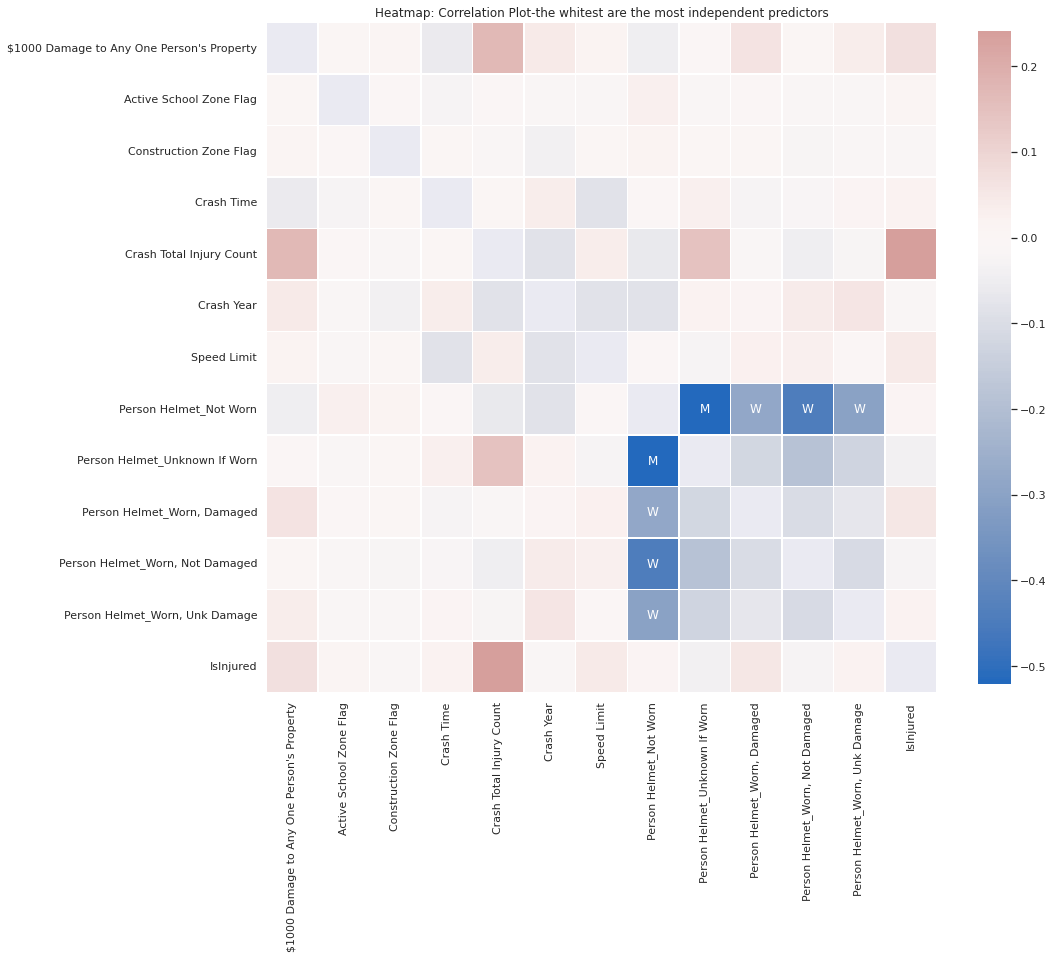

In [85]:
df_X=df_Final

# Computes feature correlation
df_corr = df_X.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}).set(title=f"Heatmap: Correlation Plot-the whitest are the most independent predictors");

In [91]:
from sklearn.model_selection import train_test_split
df_dummies = df_Final.dropna()
#x=df_dummies.drop(columns=['Severity','Crash Severity','Crash Time','At Intersection Flag',"$1000 Damage to Any One Person's Property","Active School Zone Flag","Construction Zone Flag"])
x=df_dummies.drop(columns=['IsInjured','Person Helmet_Worn, Damaged','Person Helmet_Worn, Not Damaged'])
Y=df_dummies['IsInjured']

#Split
#x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.20)


x_train, x_test, z_train, z_test = train_test_split(x, Y, test_size=0.20) #80,20
x_train

,$1000 Damage to Any One Person's Property,Active School Zone Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,Person Helmet_Not Worn,Person Helmet_Unknown If Worn,"Person Helmet_Worn, Unk Damage"
2277,1.0,0.0,0.0,1452.0,1.0,2017.0,10.0,1.0,0.0,0.0
41,1.0,0.0,0.0,2025.0,1.0,2010.0,30.0,1.0,0.0,0.0
1045,0.0,0.0,0.0,1445.0,2.0,2013.0,55.0,0.0,1.0,0.0
1159,0.0,0.0,0.0,2217.0,1.0,2013.0,35.0,0.0,1.0,0.0
656,0.0,0.0,0.0,1100.0,1.0,2012.0,35.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1603,1.0,0.0,0.0,1719.0,1.0,2014.0,-1.0,0.0,0.0,0.0
552,0.0,0.0,0.0,2025.0,1.0,2011.0,35.0,0.0,0.0,0.0
518,0.0,0.0,0.0,2126.0,1.0,2011.0,35.0,1.0,0.0,0.0
1410,0.0,0.0,0.0,1514.0,1.0,2014.0,35.0,0.0,1.0,0.0


##Logistic Regression Model

In [92]:
import statsmodels.api as sm

Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2.astype('float64'))

logr_fit = logr_model.fit() #


print(logr_fit.summary())


         Current function value: 0.012513
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              IsInjured   No. Observations:                 1970
Model:                          Logit   Df Residuals:                     1959
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 May 2022   Pseudo R-squ.:                  0.9471
Time:                        23:33:18   Log-Likelihood:                -24.650
converged:                      False   LL-Null:                       -465.63
Covariance Type:            nonrobust   LLR p-value:                4.846e-183
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      -172.6123    247.287     -0.698      0.

##Confusion Matrix

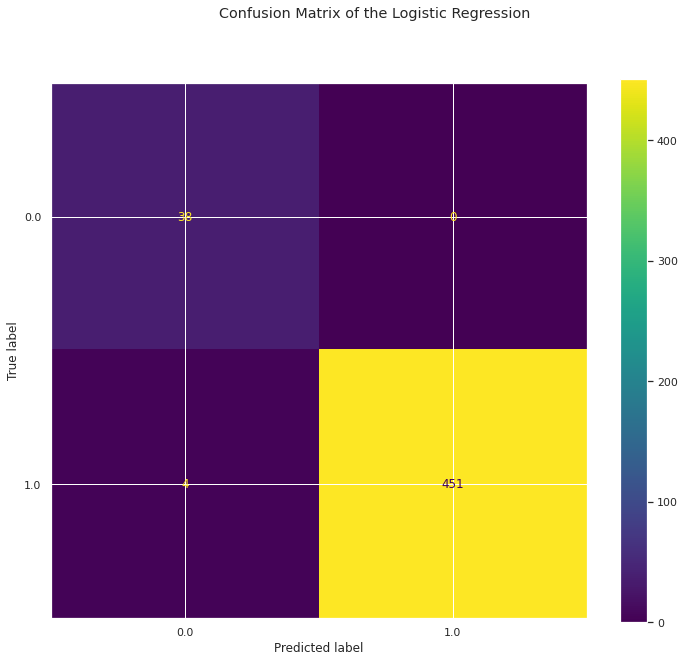

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

data = pd.get_dummies(df)  # convert categorical to one-hone encoding

logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_train,z_train)

#view results
model=model.fit(x_train, z_train)
plot_confusion_matrix(logistic_regression, x_test, z_test)  
plt.suptitle("Confusion Matrix of the Logistic Regression")
plt.show()


##AIC, BIC (BIC is not as useful but frequently presented in researches) and ROC

In [97]:
print(model.score(x_train,z_train))
z_pred=model.predict(x_test)
# Classification Report
print("Logistic Regression Classification Report\n", classification_report(z_test,z_pred ))
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(z_test, z_pred)))
print(logr_fit.aic)
print(logr_fit.bic)

0.9954314720812183
Logistic Regression Classification Report
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        38
         1.0       1.00      0.99      1.00       455

    accuracy                           0.99       493
   macro avg       0.95      1.00      0.97       493
weighted avg       0.99      0.99      0.99       493


Area Under Curve: 
0.9956043956043956
71.30018088664337
132.74385792569575


##Odds Ratio

In [95]:
#source:https://www.pythonfordatascience.org/logistic-regression-python/
model_odds = pd.DataFrame(np.exp(logr_fit.params), columns= ['OR'])
model_odds['z-value']= logr_fit.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(logr_fit.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
const,1.084973e-75,0.485161,3.504807e-286,3.358723e+135
$1000 Damage to Any One Person's Property,5.706979e+00,0.004449,1.718694e+00,1.895021e+01
Active School Zone Flag,2.379566e-14,NaN,NaN,NaN
Construction Zone Flag,2.155412e-01,0.536944,1.651705e-03,2.812732e+01
Crash Time,9.997360e-01,0.537585,9.988972e-01,1.000576e+00
Crash Total Injury Count,2.844204e+25,NaN,NaN,NaN
Crash Year,1.087406e+00,0.491899,8.562739e-01,1.380927e+00
Speed Limit,1.015468e+00,0.300099,9.864097e-01,1.045383e+00
Person Helmet_Not Worn,5.701731e+00,NaN,NaN,NaN
Person Helmet_Unknown If Worn,5.097365e+00,0.280448,2.647595e-01,9.813862e+01


##Decision Tree

In [99]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


#category_columns = ["Day of Week",'Intersection Related','Roadway Part','Surface Condition','Traffic Control Type',"Person Helmet"]
#df_dummies2 = pd.get_dummies(df, prefix_sep='_', columns=category_columns)
df_dummies2 = pd.get_dummies(df_Final)
#print(df_dummies2.columns)
x=df_dummies2.drop(columns=['IsInjured'])
Y=df_dummies2['IsInjured']
x_train, x_test, z_train, z_test = train_test_split(x, Y, test_size=0.2, random_state=1) # 80% training and 20% test


# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(x_train,z_train)
#Predict the response for test dataset
z_pred = clf.predict(x_test)
print("Decision Tree without depth requirement")
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy:\n{}".format(metrics.accuracy_score(z_test, z_pred)))
# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(z_test, z_pred)))



Decision Tree without depth requirement
Decision Tree Accuracy:
0.9898580121703854

Area Under Curve: 
0.9628940568475451


##Decision Tree Confusion Matrix

Confusion Matrix
 [[ 39   4]
 [  2 448]]


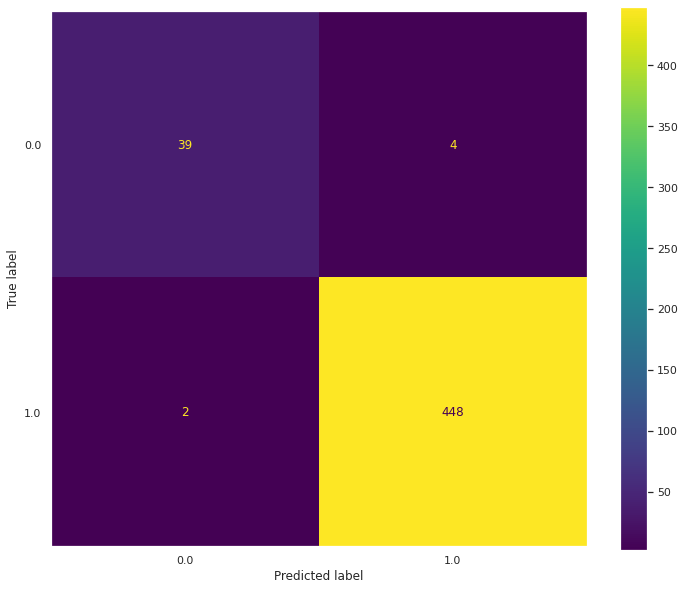

In [142]:
print("Confusion Matrix\n", confusion_matrix(z_test, clf.predict(x_test) ))
plot_confusion_matrix(clf, x_test, z_test)  
plt.grid(None)
plt.show()

##Decision Tree Classification Report

In [100]:
# Classification Report
print("Decision Tree Classification Report\n", classification_report(z_test,z_pred ))

Decision Tree Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.99      1.00      0.99       450

    accuracy                           0.99       493
   macro avg       0.97      0.96      0.97       493
weighted avg       0.99      0.99      0.99       493



##Support Functions to plot feature importance for both Decision Tree and Random Forest.

In [101]:
def plot_feature_importance_decision_Tree(X,Y):
    """
    Generates a plot of feature importance percentage
    :param X: independant features
    :param Y: dependant features
    """
    #model = xgb.XGBClassifier()
    model=DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
    model.fit(X, Y)
    importance = model.feature_importances_
    feature_importance = np.array(importance)
    feature_names = np.array(X.columns)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    data = pd.DataFrame(data).sort_values(by=['feature_importance'], ascending=False)
    fi_df = pd.DataFrame(data)
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Decision Tree Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return plt

def plot_feature_importance_forest(X,Y):
    """
    Generates a plot of feature importance percentage
    :param X: independant features
    :param Y: dependant features
    """
    #model = xgb.XGBClassifier()
    #model=DecisionTreeClassifier(criterion = "gini", random_state = 100,
                             #  max_depth=3, min_samples_leaf=5)
    #model.fit(X, Y)
    clf_Forest=RandomForestClassifier(n_estimators=30000,max_depth=4) #5000 trees


#Train the model using the training sets y_pred=clf.predict(X_test)
    clf_Forest =  clf_Forest.fit(x_train,z_train)

    importance = clf_Forest.feature_importances_
    feature_importance = np.array(importance)
    feature_names = np.array(X.columns)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    data = pd.DataFrame(data).sort_values(by=['feature_importance'], ascending=False)
    fi_df = pd.DataFrame(data)
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Decision Tree Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return plt

In [ ]:
#https://dataaspirant.com/decision-tree-algorithm-python-with-scikit-learn/
import numpy as np
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4)
clf_gini.fit(x_train, z_train)


clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=100, splitter='best')

# Train Decision Tree Classifier
clf = clf.fit(x_train,z_train)
#Predict the response for test dataset
z_pred = clf.predict(x_test)

#display(pd.DataFrame({'Variable':x.columns,'Importance':clf.feature_importances_}).sort_values('Importance', ascending=False))

feature_cols=df_Final.drop(columns=['IsInjured']).columns
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Non-Injuried','Injuried'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('accident.Severity.png')
Image(graph.create_png())



##Decicion Tree Plot Feature Importance 

,Variable,Importance
4,Crash Total Injury Count,0.971713
0,$1000 Damage to Any One Person's Property,0.014801
6,Speed Limit,0.012544
3,Crash Time,0.000942
1,Active School Zone Flag,0.000000
2,Construction Zone Flag,0.000000
5,Crash Year,0.000000
7,Person Helmet_Not Worn,0.000000
8,Person Helmet_Unknown If Worn,0.000000
9,"Person Helmet_Worn, Damaged",0.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

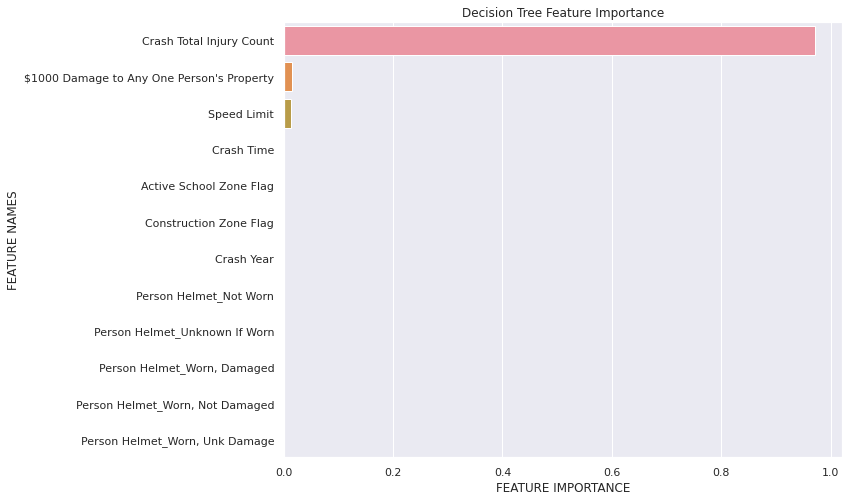

In [103]:
display(pd.DataFrame({'Variable':x.columns,'Importance':clf.feature_importances_}).sort_values('Importance', ascending=False))

plot_feature_importance_decision_Tree(x_train,z_train)

In [116]:

print("Decision Tree Depth = 4")
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy:\n{}".format(metrics.accuracy_score(z_test, z_pred)))
# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(z_test, z_pred)))



Decision Tree Depth = 4
Decision Tree Accuracy:
0.9878296146044625

Area Under Curve: 
0.951266149870801


##Random Forest

,Variable,Importance
4,Crash Total Injury Count,0.857369
3,Crash Time,0.054935
6,Speed Limit,0.028105
5,Crash Year,0.017756
0,$1000 Damage to Any One Person's Property,0.015413
8,Person Helmet_Unknown If Worn,0.006316
2,Construction Zone Flag,0.006274
10,"Person Helmet_Worn, Not Damaged",0.004440
7,Person Helmet_Not Worn,0.003913
9,"Person Helmet_Worn, Damaged",0.002985


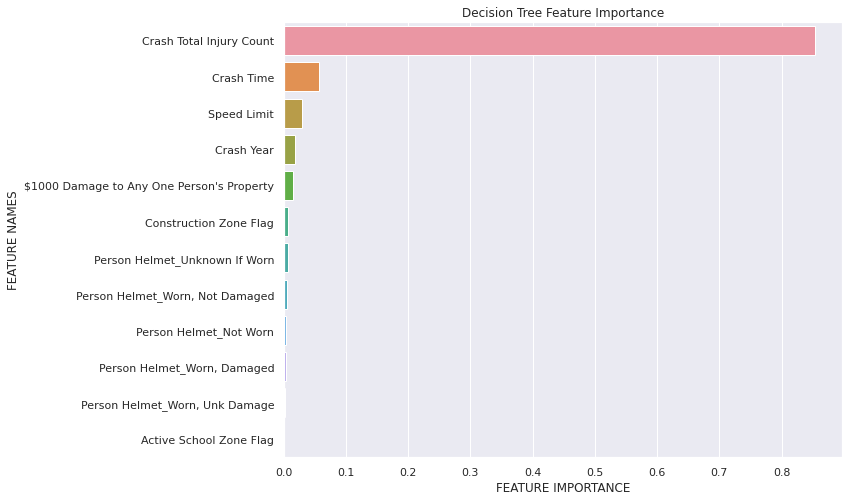

In [121]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_Forest=RandomForestClassifier(n_estimators=9000,max_depth=4) #5000 trees


#Train the model using the training sets y_pred=clf.predict(X_test)
clf_Forest =  clf_Forest.fit(x_train,z_train)

display(pd.DataFrame({'Variable':x.columns,'Importance':clf_Forest.feature_importances_}).sort_values('Importance', ascending=False))
plot_feature_importance_forest(x_train,z_train)

z_pred_forest=clf_Forest.predict(x_test)



#Optimal Decision Tree from the Random Forest

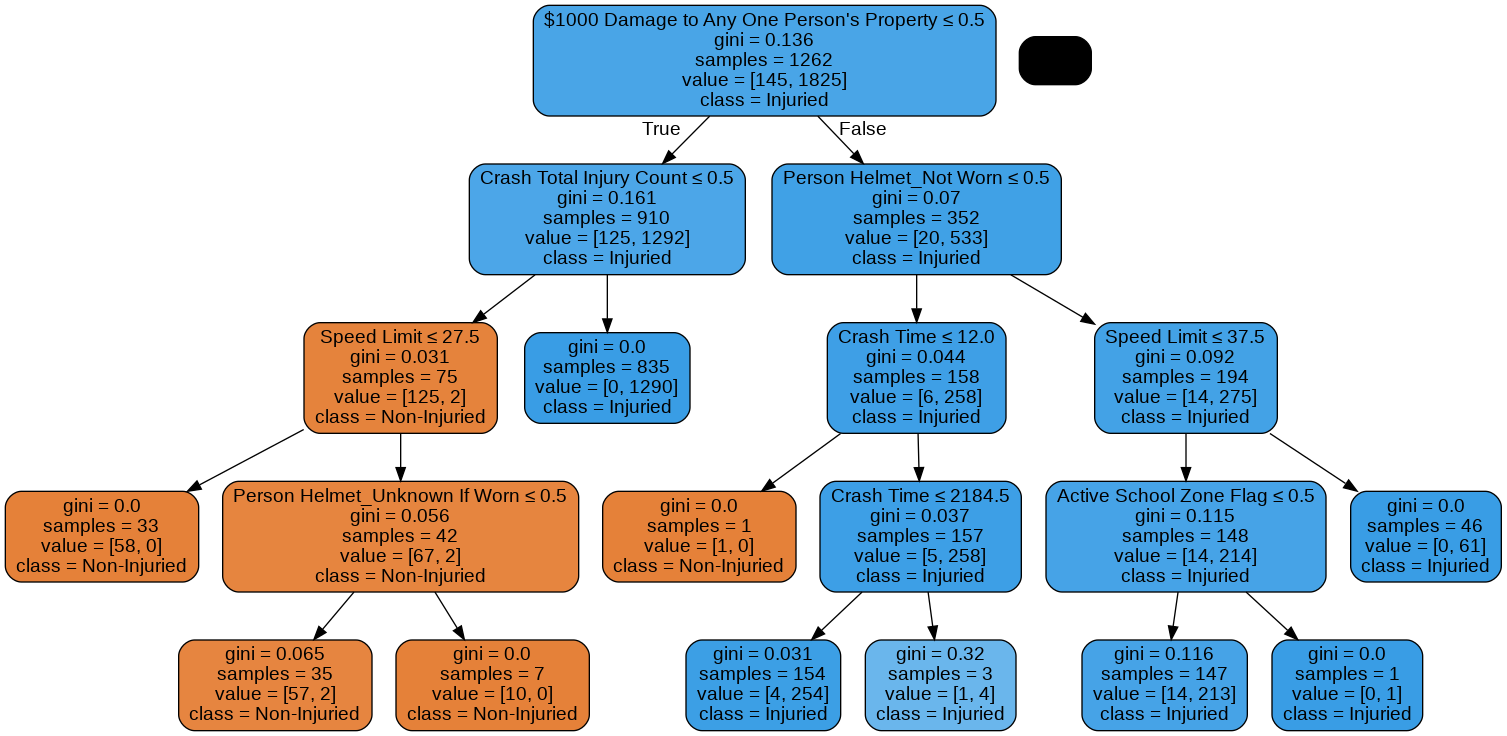

In [120]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

dot_data = StringIO()
tree.export_graphviz(clf_Forest.estimators_[99], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Non-Injuried','Injuried'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('accident.Severity.png')
Image(graph.create_png())

##Random Forest Confusion Matrix

Confusion Matrix
 [[ 43   0]
 [  3 447]]


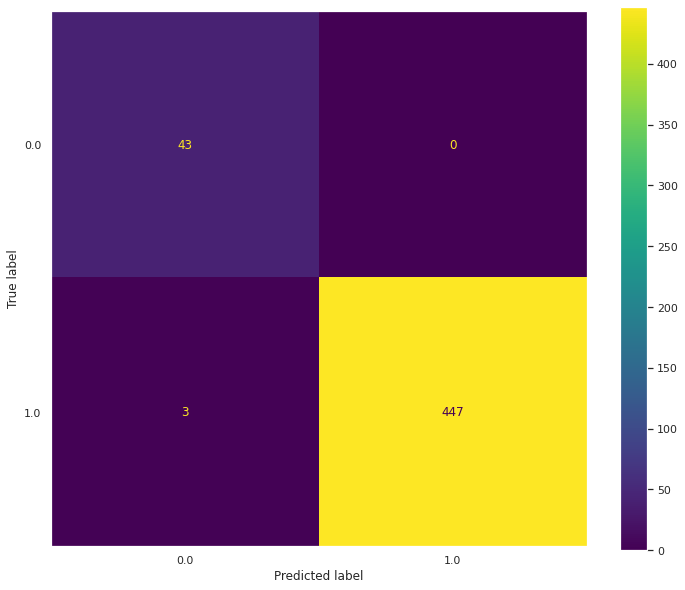

In [144]:
print("Confusion Matrix\n", confusion_matrix(z_test, clf_Forest.predict(x_test) ))
plot_confusion_matrix(clf_Forest, x_test, z_test)  
plt.grid(None)
plt.show()

##Random Forest Classification Report

In [118]:
# Classification Report
print("Random Forest Classification Report\n", classification_report(z_test,z_pred_forest ))

Random Forest Classification Report
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        43
         1.0       1.00      0.99      1.00       450

    accuracy                           0.99       493
   macro avg       0.97      1.00      0.98       493
weighted avg       0.99      0.99      0.99       493



##Random Forest Accuracy and AUC

In [119]:
print("Random Forest")
# Model Accuracy, how often is the classifier correct?
print("\nRandom Forest Accuracy:\n{}".format(metrics.accuracy_score(z_test, z_pred_forest)))
# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(z_test, z_pred_forest)))

Random Forest

Random Forest Accuracy:
0.9939148073022313

Area Under Curve: 
0.9966666666666666


Random Forest 5000

Random Forest Accuracy:
0.9918864097363083

Area Under Curve: 
0.9850387596899224

Random Forest 9000 and 30000

Random Forest Accuracy:
0.9939148073022313

Area Under Curve: 
0.9966666666666666






##Computational Performance

In [139]:
!pip install openml
import os
import openml
import joblib
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

benchmark_suite = openml.study.get_suite('OpenML-CC18') # obtain the benchmark
DIR = ""
def train_random_forest(X, y, fname_prefix):
    # train Random Forest with internal 5-fold CV
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    for fold, (train_index, validation_index) in enumerate(skf.split(X, y)):
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]
        
        model = RandomForestClassifier(n_estimators=9000, random_state=1234, n_jobs=-1)
        model.fit(x_train, z_train)
        joblib.dump(model, fname_prefix + f"_f_{fold}", compress=3)
        

for task_id in benchmark_suite.tasks:  # iterate over all tasks
    task = openml.tasks.get_task(task_id)  # download the OpenML task
    X, y = task.get_X_and_y()  # get the data
    
    # basic preprocessing
    df = pd.DataFrame(X)
    to_remove = []
    for col in df.columns:
        empty_column = np.sum(pd.isnull(df[col]) == True) == df.shape[0]
        constant_column = len(np.unique(df.loc[~pd.isnull(df[col]), col])) == 1
        if empty_column or constant_column:
            to_remove += [col]
    # remove constant and empty columns
    df.drop(to_remove, inplace=True, axis=1)
    # fill missing values with mode
    df_mode = df.mode().iloc[0]
    df = df.fillna(df_mode)
    X = np.array(df) # back to numpy array
    
    # repeat 10 times (10-fold CV)
    n_repeats, n_folds, n_samples = task.get_split_dimensions()
    for fold in range(n_folds):
        train_indices, test_indices = task.get_train_test_split_indices(repeat=0, fold=fold, sample=0)
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]

        fname_prefix = os.path.join(DIR, f"task_{task_id}_repeat_{fold}_rf")
        train_random_forest(X_train, y_train, fname_prefix)

   

KeyboardInterrupt: ignored

In [ ]:
#https://mljar.com/blog/how-many-trees-in-random-forest/


def compute_performance(X, y, X_test, y_test, fname_prefix):
    FOLDS = 5
    results = {}
    # iterate over trees, with 100 trees step
    for t in range(10):
        trees = 100*(t+1)
        response = None 
        for cv_fold in range(FOLDS):
            model = joblib.load(fname_prefix + f"_f_{cv_fold}") # load model
            model.estimators_ = model.estimators_[:trees]
            proba = model.predict_proba(X_test)
            response = proba if response is None else response + proba
        response /= float(FOLDS) # the final prediction is average from internal cross-validation
        ll = log_loss(y_test, response)
        results[trees] = ll
    
    # check the number of trees with minimum loss on validation data set (1 tree step)
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=1234)
    selected_trees = []
    response = None
    for cv_fold, (train_index, validation_index) in enumerate(skf.split(X, y)):
        X_validation = X[validation_index]
        y_validation = y[validation_index]
        
        model = joblib.load(fname_prefix + f"_f_{cv_fold}") # load model
        y_validation_predicted = None
        losses = []
        # iterate over each tree
        for count, estimator in enumerate(model.estimators_):
            proba = estimator.predict_proba(X_validation)
            y_validation_predicted = proba if y_validation_predicted is None else proba + y_validation_predicted
            losses += [log_loss(y_validation, y_validation_predicted / float(count+1.0))]
         
        # set selected number of trees    
        selected_trees += [np.argmin(losses)]
        model.estimators_ = model.estimators_[:selected_trees[-1]]
        proba = model.predict_proba(X_test)
        response = proba if response is None else response + proba
        
    response /= float(FOLDS)
    ll = log_loss(y_test, response)
    results["Selected"] = ll
        
    return results, selected_trees

In [ ]:
all_results = {}
all_selected_trees = {}
for task_id in benchmark_suite.tasks:  # iterate over all tasks
    task = openml.tasks.get_task(task_id)  # download the OpenML task
    X, y = task.get_X_and_y()  # get the data
    
    # basic preprocessing
    df = pd.DataFrame(X)
    to_remove = []
    for col in df.columns:
        empty_column = np.sum(pd.isnull(df[col]) == True) == df.shape[0]
        constant_column = len(np.unique(df.loc[~pd.isnull(df[col]), col])) == 1
        if empty_column or constant_column:
            to_remove += [col]

    df.drop(to_remove, inplace=True, axis=1)    
    df_mode = df.mode().iloc[0]
    df = df.fillna(df_mode)
    X = np.array(df)
    
    all_results[task_id] = []
    all_selected_trees[task_id] = []
    n_repeats, n_folds, n_samples = task.get_split_dimensions()
    for fold in range(n_folds):
        train_indices, test_indices = task.get_train_test_split_indices(repeat=0, fold=fold, sample=0)

        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]

        fname_prefix = os.path.join(DIR, f"task_{task_id}_repeat_{fold}_rf")
        results, selected_trees = compute_performance(X_train, y_train, X_test, y_test, fname_prefix)
        
        all_results[task_id] += [results]
        all_selected_trees[task_id] += [selected_trees]
